In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter

In [56]:
names=['sepal_length','sepal_width','petal_length','petal_width','Class']
df=pd.read_csv('Iris.csv',header=None,names=names)
df.drop(['Id'])


,sepal_length,sepal_width,petal_length,petal_width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [57]:
df=pd.get_dummies(df)

In [58]:
X=df.iloc[:, :-1].values
y=df.iloc[:, 4].values

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [75]:
acc=accuracy_score(y_test,y_pred)*100
print('\n The accuracy of the knn classifier for k=5 is %d%%' %acc)


 The accuracy of the knn classifier for k=5 is 96%


In [65]:
myList=list(range(0,50))
neighbors=list(filter(lambda x: x%2!=0,myList))
cv_scores=[]

In [66]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated clas

In [42]:
MSE=[1-x for x in cv_scores]

In [67]:
optimal_k=neighbors[MSE.index(min(MSE))]
print('\n The optimal number of neighbors is %d.' % optimal_k)


 The optimal number of neighbors is 1.


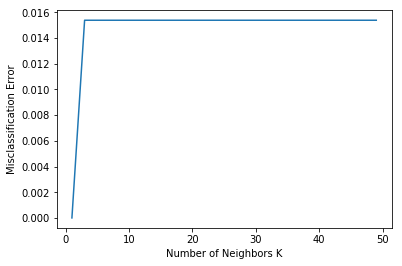

In [68]:
plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [70]:
def train(X_train,y_train):
    return

In [71]:
def predict(X_train,y_train,x_test,k):
    distances=[]
    targets=[]
    
    for i in range(len(X_train)):
        distance=np.sqrt(np.sum(np.square(x_test-X_train[i, :])))
        distances.append([distance, i])
    distances=sorted(distances)
    for i in range(k):
        index=distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0]

In [72]:
def kNearestNeighbor(X_train,y_train,X_test,predictions,k):
    if k>len(X_train):
        raise ValueError
    train(X_train,y_train)
    
    for i in range(len(X_test)):
        predictions.append(predict(X_train,y_train,X_train[i, :],k))


In [73]:
predictions=[]
try:
    kNearestNeighbor(X_train,y_train,X_test,predictions,7)
    predictions=np.asarray(predictions)
    accuracy=accuracy_score(y_test,predictions)*100
    print('\nThe accuracy of OUR classifier is %d%%' % accuracy)
except ValueError:
    print('Can\'t have more neighbors than training samples!')


The accuracy of OUR classifier is 96%


In [ ]:
value=1/targets